# Team 82 Final EDA

##  Team 82 project examines factors affecting students test scores in grades 4 and 8.
We examine parent social and economic demographics, school funding  and  community factors 

In [1]:
import pandas as pd
import numpy as np
import os
import json
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
dfs= ('df_1011','df_1112','df_1213','df_1314','df_1415','df_1516','df_1617','df_1718')
dfs1618= ('df_1617','df_1718')

In [3]:
math_df_201011 = pd.read_csv('./data_sets/clean/math_scores_sy1011.csv')
math_df_201112 = pd.read_csv('./data_sets/clean/math_scores_sy1112.csv')
math_df_201213 = pd.read_csv('./data_sets/clean/math_scores_sy1213.csv')
math_df_201314 = pd.read_csv('./data_sets/clean/math_scores_sy1314.csv')
math_df_201415 = pd.read_csv('./data_sets/clean/math_scores_sy1415.csv')
math_df_201516 = pd.read_csv('./data_sets/clean/math_scores_sy1516.csv')
math_df_201617 = pd.read_csv('./data_sets/clean/math_scores_sy1617.csv')
math_df_201718 = pd.read_csv('./data_sets/clean/math_scores_sy1718.csv')

rla_df_201011 = pd.read_csv('./data_sets/clean/rla_scores_sy1011.csv')
rla_df_201112 = pd.read_csv('./data_sets/clean/rla_scores_sy1112.csv')
rla_df_201213 = pd.read_csv('./data_sets/clean/rla_scores_sy1213.csv')
rla_df_201314 = pd.read_csv('./data_sets/clean/rla_scores_sy1314.csv')
rla_df_201415 = pd.read_csv('./data_sets/clean/rla_scores_sy1415.csv')
rla_df_201516 = pd.read_csv('./data_sets/clean/rla_scores_sy1516.csv')
rla_df_201617 = pd.read_csv('./data_sets/clean/rla_scores_sy1617.csv')
rla_df_201718 = pd.read_csv('./data_sets/clean/rla_scores_sy1718.csv')

parent_social_econ_by_district_df = pd.read_csv('./data_sets/clean/teacher_parentdg_econ_social_dg20142018.csv')



/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (20,24,216) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (19,21,25) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (17,45,129,143) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (8,10,12,14,16,18,20,22,24,26,28,30,32,33,34,38,40,42,46,52,54,56,58,60,62,64,68,70,72,74,76,78,80,82,84,86,88,90,92,94,96,98,100,102,104,106,10

## Math Analysis for School Year 2010  - 2011 

In [4]:
# Math scoores  by school district
math_df_201011

,STNAM,FIPST,LEAID,leanm10,ALL_MTH04numvalid_1011,ALL_MTH04pctprof_1011,ECD_MTH04numvalid_1011,ECD_MTH04pctprof_1011,HOM_MTH04numvalid_1011,HOM_MTH04pctprof_1011,ALL_MTH08numvalid_1011,ALL_MTH08pctprof_1011,ECD_MTH08numvalid_1011,ECD_MTH08pctprof_1011,HOM_MTH08numvalid_1011,HOM_MTH08pctprof_1011
0,ALABAMA,1,100002,Alabama Youth Services,NaN,NaN,NaN,NaN,NaN,NaN,31.0,24.0,NaN,NaN,1.0,NaN
1,ALABAMA,1,100005,Albertville City,320.0,89.0,221.0,87.0,5.0,NaN,267.0,77.0,169.0,72.0,9.0,25.0
2,ALABAMA,1,100006,Marshall County,422.0,91.0,323.0,90.0,38.0,84.0,427.0,85.0,286.0,82.0,28.0,70.0
3,ALABAMA,1,100007,Hoover City,1036.0,86.0,232.0,67.0,4.0,NaN,1032.0,93.0,214.0,82.0,1.0,NaN
4,ALABAMA,1,100008,Madison City,605.0,89.0,136.0,72.0,1.0,NaN,747.0,92.0,124.0,77.0,1.0,NaN
5,ALABAMA,1,100009,Al Inst Deaf And Blind,18.0,10.0,NaN,NaN,NaN,NaN,23.0,30.0,NaN,NaN,NaN,NaN
6,ALABAMA,1,100011,Leeds City,113.0,77.0,69.0,72.0,12.0,25.0,119.0,77.0,73.0,72.0,5.0,NaN
7,ALABAMA,1,100012,Boaz City,161.0,77.0,96.0,62.0,4.0,NaN,177.0,87.0,91.0,77.0,3.0,NaN
8,ALABAMA,1,100013,Trussville City,320.0,90.0,20.0,70.0,NaN,NaN,327.0,88.0,35.0,5.0,NaN,NaN
9,ALABAMA,1,100018,Alabama School of Fine Arts,NaN,NaN,NaN,NaN,NaN,NaN,48.0,5.0,NaN,NaN,NaN,NaN


In [5]:
math_df_201011_clean = math_df_201011.dropna()
math_df_201112_clean = math_df_201112.dropna()
math_df_201213_clean = math_df_201213.dropna()
math_df_201314_clean = math_df_201314.dropna()
math_df_201415_clean = math_df_201415.dropna()
math_df_201516_clean = math_df_201516.dropna()
math_df_201617_clean = math_df_201617.dropna()
math_df_201718_clean = math_df_201718.dropna()

In [6]:
math_states_2011 = math_df_201011_clean.groupby(by=["STNAM"]).mean()
math_states_2012 = math_df_201112_clean.groupby(by=["STNAM"]).mean()
math_states_2013 = math_df_201213_clean.groupby(by=["STNAM"]).mean()
math_states_2014 = math_df_201314_clean.groupby(by=["STNAM"]).mean()

In [7]:

math_states_2011

,FIPST,LEAID,ALL_MTH04numvalid_1011,ALL_MTH04pctprof_1011,ECD_MTH04numvalid_1011,ECD_MTH04pctprof_1011,HOM_MTH04numvalid_1011,HOM_MTH04pctprof_1011,ALL_MTH08numvalid_1011,ALL_MTH08pctprof_1011,ECD_MTH08numvalid_1011,ECD_MTH08pctprof_1011,HOM_MTH08numvalid_1011,HOM_MTH08pctprof_1011
STNAM,,,,,,,,,,,,,,
ALABAMA,1.0,1.016276e+05,844.416667,78.250000,504.000000,73.916667,25.541667,45.833333,806.875000,72.791667,434.250000,70.000000,18.541667,43.958333
ALASKA,2.0,2.003780e+05,1425.800000,80.800000,640.800000,71.600000,46.200000,49.200000,1377.200000,74.400000,533.600000,62.800000,46.600000,42.200000
ARIZONA,4.0,4.043173e+05,1039.869565,61.891304,603.869565,55.804348,27.478261,38.391304,1000.847826,49.847826,528.826087,41.804348,23.630435,27.717391
ARKANSAS,5.0,5.079958e+05,553.842105,80.210526,340.631579,75.842105,17.000000,39.263158,510.421053,64.578947,286.526316,56.105263,11.000000,29.210526
BUREAU OF INDIAN AFFAIRS,59.0,5.900104e+06,38.800000,43.000000,38.800000,43.000000,13.800000,39.000000,35.400000,23.200000,35.400000,23.200000,11.800000,30.000000
CALIFORNIA,6.0,6.212173e+05,1524.458937,68.053140,1036.188406,61.642512,64.338164,46.227053,1494.033816,42.855072,965.623188,36.183575,51.584541,29.603865
COLORADO,8.0,8.044205e+05,2039.550000,89.500000,962.400000,85.300000,54.600000,60.650000,1844.950000,74.400000,775.050000,64.850000,34.500000,46.650000
CONNECTICUT,9.0,9.028740e+05,964.800000,64.800000,803.200000,61.400000,19.800000,36.800000,930.000000,63.000000,729.600000,57.200000,12.600000,27.000000
DELAWARE,10.0,1.000745e+06,640.666667,66.000000,387.750000,57.416667,30.916667,29.000000,608.333333,60.083333,337.666667,49.666667,26.333333,26.250000


In [8]:
# MTH04 =  Math Grade 4   MTH08 = Math Grade 8
# ECD =  Economically Disadvantaged  HOM = Homeless   
math_states_2011.columns



Index(['FIPST', 'LEAID', 'ALL_MTH04numvalid_1011', 'ALL_MTH04pctprof_1011',
       'ECD_MTH04numvalid_1011', 'ECD_MTH04pctprof_1011',
       'HOM_MTH04numvalid_1011', 'HOM_MTH04pctprof_1011',
       'ALL_MTH08numvalid_1011', 'ALL_MTH08pctprof_1011',
       'ECD_MTH08numvalid_1011', 'ECD_MTH08pctprof_1011',
       'HOM_MTH08numvalid_1011', 'HOM_MTH08pctprof_1011'],
      dtype='object')

In [9]:

print ( math_states_2011[['ALL_MTH04numvalid_1011', 'ALL_MTH04pctprof_1011',
                           'ECD_MTH04numvalid_1011', 'ECD_MTH04pctprof_1011',
                           'HOM_MTH04numvalid_1011', 'HOM_MTH04pctprof_1011',
                           'ALL_MTH08numvalid_1011', 'ALL_MTH08pctprof_1011',
                            'ECD_MTH08numvalid_1011', 'ECD_MTH08pctprof_1011',
                           'HOM_MTH08numvalid_1011', 'HOM_MTH08pctprof_1011']].describe(), "\n")

       ALL_MTH04numvalid_1011  ALL_MTH04pctprof_1011  ECD_MTH04numvalid_1011  \
count               49.000000              49.000000               49.000000   
mean              2507.321656              68.438518             1587.364669   
std               5618.352658              13.908299             4119.035556   
min                 38.800000              34.750000               38.800000   
25%                839.296296              61.000000              402.041667   
50%               1172.666667              69.487179              697.375000   
75%               1762.645833              78.250000             1039.604167   
max              37732.000000              91.466667            28516.000000   

       ECD_MTH04pctprof_1011  HOM_MTH04numvalid_1011  HOM_MTH04pctprof_1011  \
count              49.000000               49.000000              49.000000   
mean               61.552052               58.026987              41.052895   
std                14.807518              

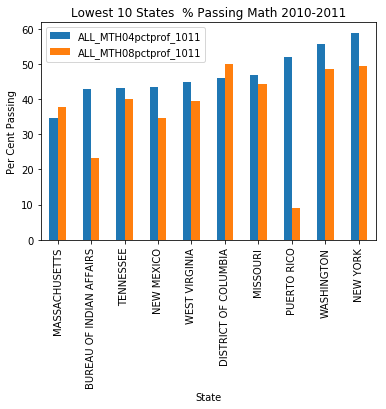

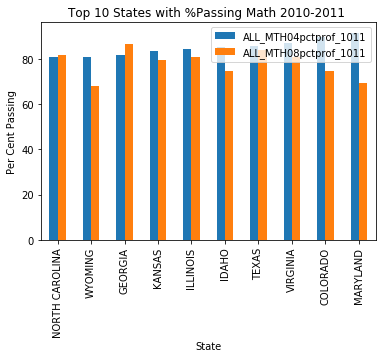

,FIPST,LEAID,ALL_MTH04numvalid_1011,ALL_MTH04pctprof_1011,ECD_MTH04numvalid_1011,ECD_MTH04pctprof_1011,HOM_MTH04numvalid_1011,HOM_MTH04pctprof_1011,ALL_MTH08numvalid_1011,ALL_MTH08pctprof_1011,ECD_MTH08numvalid_1011,ECD_MTH08pctprof_1011,HOM_MTH08numvalid_1011,HOM_MTH08pctprof_1011
STNAM,,,,,,,,,,,,,,
MASSACHUSETTS,25.0,2.506938e+06,922.950000,34.750000,686.250000,26.850000,35.150000,17.300000,876.850000,37.700000,625.650000,28.700000,27.250000,19.600000
BUREAU OF INDIAN AFFAIRS,59.0,5.900104e+06,38.800000,43.000000,38.800000,43.000000,13.800000,39.000000,35.400000,23.200000,35.400000,23.200000,11.800000,30.000000
TENNESSEE,47.0,4.702629e+06,2697.833333,43.083333,1697.500000,32.250000,69.000000,24.583333,2593.166667,40.000000,1519.166667,27.416667,51.666667,23.916667
NEW MEXICO,35.0,3.501083e+06,1454.000000,43.333333,1088.222222,37.333333,57.222222,25.333333,1271.555556,34.666667,884.888889,27.888889,39.222222,23.222222
WEST VIRGINIA,54.0,5.400729e+06,709.300000,45.000000,383.500000,33.600000,18.500000,32.400000,687.800000,39.500000,333.100000,28.000000,13.900000,27.500000
DISTRICT OF COLUMBIA,11.0,1.100030e+06,3378.000000,46.000000,2286.000000,36.000000,125.000000,37.000000,2543.000000,50.000000,1625.000000,43.000000,89.000000,47.000000
MISSOURI,29.0,2.920111e+06,643.406250,46.812500,385.218750,37.937500,24.062500,26.093750,632.406250,44.218750,345.312500,33.375000,21.906250,24.250000
PUERTO RICO,72.0,7.200030e+06,37732.000000,52.000000,28516.000000,51.000000,823.000000,46.000000,37650.000000,9.000000,25919.000000,8.000000,779.000000,6.000000
WASHINGTON,53.0,5.304895e+06,885.433962,55.603774,465.075472,45.622642,18.849057,27.264151,856.245283,48.528302,400.867925,35.566038,17.962264,24.358491


In [10]:
#df.sort_values(by=['col1']

math_states_2011_sorted = math_states_2011.sort_values(by=['ALL_MTH04pctprof_1011'])
tdf = math_states_2011_sorted[['ALL_MTH04pctprof_1011','ALL_MTH08pctprof_1011']][0:10]
tdf8 = math_states_2011_sorted[['ALL_MTH04pctprof_1011','ALL_MTH08pctprof_1011']][0:10]

tdf8.plot.bar()

plt.xlabel('State')
plt.ylabel("Per Cent Passing")
plt.title('Lowest 10 States  % Passing Math 2010-2011')
plt.show()

tdf8 = math_states_2011_sorted[['ALL_MTH04pctprof_1011','ALL_MTH08pctprof_1011']][-10:]

tdf8.plot.bar()
plt.xlabel('State')
plt.ylabel("Per Cent Passing")
plt.title('Top 10 States with %Passing Math 2010-2011 ')
plt.show()



math_states_2011_sorted 

In [11]:
parent_social_econ_by_district_df 


,GeoId_x,Geography_x,LEAID,Year_x,Iteration_x,pct_Below PovLvL_All_Ages,pctmoe_Below PovLvL_All_Ages,pct_Below PovLvL_Age_gte_18,pctmoe_Below PovLvL_Age_gte_18,pct_Below PovLvL_Age_18_64,...,num_Educational_Attain_POP_AssocDeg,pc_Educational_Attain_POP_AssocDeg,num_Educational_Attain_POP_BacDeg,pc_Educational_Attain_POP_BacDeg,num_Educational_Attain_POP_GradProf,pc_Educational_Attain_POP_GradProf,PDP02.5_37est,pct_Educational_Attain_POP_HS_Grad_higher,PDP02.5_38est,pct_Educational_Attain_BS_Deg_higher
0,97000US2700106,A.C.G.C. Public School District,2700106,2014-2018,202,11.8,3.1,11.8,3.1,11.8,...,175.0,19.0,140.0,15.0,40.0,4.0,855.0,94.0,180.0,19.0
1,97000US4500690,Abbeville County School District,4500690,2014-2018,202,21.9,5.5,21.9,5.5,21.9,...,580.0,19.0,460.0,15.0,250.0,8.0,2740.0,92.0,715.0,24.0
2,97000US5500030,Abbotsford School District,5500030,2014-2018,202,16.0,6.9,16.0,6.9,16.1,...,65.0,9.0,75.0,11.0,4.0,0.0,545.0,81.0,80.0,11.0
3,97000US4807380,Abbott Independent School District,4807380,2014-2018,202,0.0,17.3,0.0,17.3,0.0,...,45.0,21.0,80.0,38.0,25.0,11.0,205.0,97.0,105.0,50.0
4,97000US5300030,Aberdeen School District,5300030,2014-2018,202,18.3,5.1,18.3,5.1,18.4,...,255.0,8.0,275.0,9.0,265.0,9.0,2410.0,83.0,540.0,18.0
5,97000US2800360,Aberdeen School District,2800360,2014-2018,202,14.9,7.5,14.9,7.5,15.1,...,160.0,12.0,150.0,11.0,40.0,3.0,1155.0,91.0,190.0,15.0
6,97000US1600030,Aberdeen School District 58,1600030,2014-2018,202,16.0,12.5,16.0,12.5,16.0,...,45.0,7.0,50.0,8.0,45.0,7.0,420.0,73.0,95.0,16.0
7,97000US4807410,Abernathy Independent School District,4807410,2014-2018,202,6.9,6.9,6.9,6.9,6.9,...,30.0,4.0,145.0,19.0,30.0,4.0,680.0,90.0,175.0,23.0
8,97000US4807440,Abilene Independent School District,4807440,2014-2018,202,16.7,2.3,16.7,2.4,16.8,...,1480.0,10.0,1725.0,12.0,890.0,6.0,12175.0,89.0,2615.0,19.0
9,97000US2003180,Abilene Unified School District 435,2003180,2014-2018,202,2.3,2.2,2.3,2.2,2.3,...,145.0,10.0,305.0,21.0,100.0,7.0,1270.0,91.0,410.0,29.0


In [12]:
parent_social_econ_by_district_df_clean = parent_social_econ_by_district_df.dropna()

In [13]:
parent_social_econ_by_district_states_df = parent_social_econ_by_district_df.groupby(by=["ST_NAME"]).mean()

In [14]:
parent_social_econ_by_district_df_clean.columns

Index(['GeoId_x', 'Geography_x', 'LEAID', 'Year_x', 'Iteration_x',
       'pct_Below PovLvL_All_Ages', 'pctmoe_Below PovLvL_All_Ages',
       'pct_Below PovLvL_Age_gte_18', 'pctmoe_Below PovLvL_Age_gte_18',
       'pct_Below PovLvL_Age_18_64', 'pctmoe_Below PovLvL_Age_18_64',
       'pct_Below PovLvL_Age_gte_65', 'pctmoe_Below PovLvL_Age_gte_65',
       'LEA_NAME', 'ST_NAME', 'LEA_CWIFTEST', 'LEA_CWIFTSE', 'GeoId_y',
       'Geography_y', 'Year_y', 'Iteration_y', 'num_Educational_Attain_POP',
       'num_Educational_Attain_POP_LT9th', 'pc_ Educational_Attain_POP_LT9th',
       'num_Educational_Attain_POP_9th-12th',
       'pc_Educational_Attain_POP_9th-12th',
       'num_Educational_Attain_POP_HS_GRAD',
       'pc_Educational_Attain_POP_HS_GRAD',
       'num_Educational_Attain_POP_SomeColl',
       'pc_Educational_Attain_POP_SomeColl',
       'num_Educational_Attain_POP_AssocDeg',
       'pc_Educational_Attain_POP_AssocDeg',
       'num_Educational_Attain_POP_BacDeg', 'pc_Educational_A

In [15]:
print (parent_social_econ_by_district_df_clean[['pct_Below PovLvL_All_Ages', 'pctmoe_Below PovLvL_All_Ages',
       'pct_Below PovLvL_Age_gte_18', 'pctmoe_Below PovLvL_Age_gte_18',
       'pct_Below PovLvL_Age_18_64', 'pctmoe_Below PovLvL_Age_18_64',
       'pct_Below PovLvL_Age_gte_65', 'pctmoe_Below PovLvL_Age_gte_65',
       'LEA_CWIFTEST', 'LEA_CWIFTSE',
       'num_Educational_Attain_POP_LT9th', 'pc_ Educational_Attain_POP_LT9th',
       'num_Educational_Attain_POP_9th-12th',
       'pc_Educational_Attain_POP_9th-12th',
       'num_Educational_Attain_POP_HS_GRAD',
       'pc_Educational_Attain_POP_HS_GRAD',
       'num_Educational_Attain_POP_SomeColl',
       'pc_Educational_Attain_POP_SomeColl',
       'num_Educational_Attain_POP_AssocDeg',
       'pc_Educational_Attain_POP_AssocDeg',
       'num_Educational_Attain_POP_BacDeg', 'pc_Educational_Attain_POP_BacDeg',
       'num_Educational_Attain_POP_GradProf',
       'pc_Educational_Attain_POP_GradProf', 'PDP02.5_37est',
       'pct_Educational_Attain_POP_HS_Grad_higher', 'PDP02.5_38est',
       'pct_Educational_Attain_BS_Deg_higher']].describe())

       pct_Below PovLvL_All_Ages  pctmoe_Below PovLvL_All_Ages  \
count                5920.000000                   5920.000000   
mean                   12.172010                      4.677044   
std                     8.719912                      3.066878   
min                     0.000000                      0.200000   
25%                     5.500000                      2.400000   
50%                    10.300000                      4.000000   
75%                    17.000000                      6.100000   
max                    62.500000                     25.900000   

       pct_Below PovLvL_Age_gte_18  pctmoe_Below PovLvL_Age_gte_18  \
count                  5920.000000                     5920.000000   
mean                     12.168193                        4.675642   
std                       8.718201                        3.066471   
min                       0.000000                        0.200000   
25%                       5.500000                     

In [17]:
df = parent_social_econ_by_district_states_df

# reset index  only once
#df.reset_index(level=0, inplace=True)
df['ST_NAME'] =df['ST_NAME'].str.upper()
df2 =math_states_2011
#df2.reset_index(level=0, inplace=True)
#merge test results and parent data
df3 =df.merge(df2, left_on='ST_NAME', right_on='STNAM')

In [18]:
df3


,ST_NAME,LEAID_x,Iteration_x,pct_Below PovLvL_All_Ages,pctmoe_Below PovLvL_All_Ages,pct_Below PovLvL_Age_gte_18,pctmoe_Below PovLvL_Age_gte_18,pct_Below PovLvL_Age_18_64,pctmoe_Below PovLvL_Age_18_64,pct_Below PovLvL_Age_gte_65,...,ECD_MTH04numvalid_1011,ECD_MTH04pctprof_1011,HOM_MTH04numvalid_1011,HOM_MTH04pctprof_1011,ALL_MTH08numvalid_1011,ALL_MTH08pctprof_1011,ECD_MTH08numvalid_1011,ECD_MTH08pctprof_1011,HOM_MTH08numvalid_1011,HOM_MTH08pctprof_1011
0,ALABAMA,1.016377e+05,202.0,18.400000,5.970370,18.383704,5.968148,18.431111,5.986667,6.555422,...,504.000000,73.916667,25.541667,45.833333,806.875000,72.791667,434.250000,70.000000,18.541667,43.958333
1,ALASKA,2.003973e+05,202.0,14.681395,5.065116,14.688372,5.065116,14.734884,5.006977,11.418182,...,640.800000,71.600000,46.200000,49.200000,1377.200000,74.400000,533.600000,62.800000,46.600000,42.200000
2,ARIZONA,4.049697e+05,202.0,20.117021,6.129078,20.105674,6.134752,20.125532,6.158865,16.908738,...,603.869565,55.804348,27.478261,38.391304,1000.847826,49.847826,528.826087,41.804348,23.630435,27.717391
3,ARKANSAS,5.068456e+05,202.0,17.702727,8.444091,17.690455,8.431818,17.725909,8.459091,15.794444,...,340.631579,75.842105,17.000000,39.263158,510.421053,64.578947,286.526316,56.105263,11.000000,29.210526
4,CALIFORNIA,6.211498e+05,202.0,13.941816,5.924072,13.939615,5.923796,13.954746,5.941403,9.727851,...,1036.188406,61.642512,64.338164,46.227053,1494.033816,42.855072,965.623188,36.183575,51.584541,29.603865
5,COLORADO,8.044265e+05,202.0,10.395312,5.747656,10.395312,5.747656,10.441406,5.782813,4.914286,...,962.400000,85.300000,54.600000,60.650000,1844.950000,74.400000,775.050000,64.850000,34.500000,46.650000
6,CONNECTICUT,9.026891e+05,202.0,5.324841,3.580255,5.324204,3.579618,5.328662,3.584713,3.781319,...,803.200000,61.400000,19.800000,36.800000,930.000000,63.000000,729.600000,57.200000,12.600000,27.000000
7,DELAWARE,1.000764e+06,202.0,11.600000,3.387500,11.600000,3.387500,11.650000,3.406250,5.015385,...,387.750000,57.416667,30.916667,29.000000,608.333333,60.083333,337.666667,49.666667,26.333333,26.250000
8,DISTRICT OF COLUMBIA,1.100030e+06,202.0,16.400000,1.000000,16.400000,1.000000,16.400000,1.000000,18.000000,...,2286.000000,36.000000,125.000000,37.000000,2543.000000,50.000000,1625.000000,43.000000,89.000000,47.000000
9,FLORIDA,1.201020e+06,202.0,16.598507,3.782090,16.598507,3.783582,16.583582,3.788060,16.378689,...,2478.895833,67.666667,70.791667,52.541667,3939.916667,67.520833,2253.270833,58.500000,50.583333,40.416667


In [19]:
df3.columns


Index(['ST_NAME', 'LEAID_x', 'Iteration_x', 'pct_Below PovLvL_All_Ages',
       'pctmoe_Below PovLvL_All_Ages', 'pct_Below PovLvL_Age_gte_18',
       'pctmoe_Below PovLvL_Age_gte_18', 'pct_Below PovLvL_Age_18_64',
       'pctmoe_Below PovLvL_Age_18_64', 'pct_Below PovLvL_Age_gte_65',
       'pctmoe_Below PovLvL_Age_gte_65', 'LEA_CWIFTEST', 'LEA_CWIFTSE',
       'Iteration_y', 'num_Educational_Attain_POP',
       'num_Educational_Attain_POP_LT9th', 'pc_ Educational_Attain_POP_LT9th',
       'num_Educational_Attain_POP_9th-12th',
       'pc_Educational_Attain_POP_9th-12th',
       'num_Educational_Attain_POP_HS_GRAD',
       'pc_Educational_Attain_POP_HS_GRAD',
       'num_Educational_Attain_POP_SomeColl',
       'pc_Educational_Attain_POP_SomeColl',
       'num_Educational_Attain_POP_AssocDeg',
       'pc_Educational_Attain_POP_AssocDeg',
       'num_Educational_Attain_POP_BacDeg', 'pc_Educational_Attain_POP_BacDeg',
       'num_Educational_Attain_POP_GradProf',
       'pc_Educational_A

In [20]:
Parent_social_econ_df_sy201011=df3
Education_dict={'pc_ Educational_Attain_POP_LT9th': "% Education Lower than 9th Grade",
       'pc_Educational_Attain_POP_9th-12th' : "% Education 9th -12 Grade",
       'pc_Educational_Attain_POP_HS_GRAD':"% Education High School Diploma",
       'pc_Educational_Attain_POP_SomeColl' : "% Education Some College",
       'pc_Educational_Attain_POP_AssocDeg': " % Education Associate Degree",
       'pc_Educational_Attain_POP_BacDeg' : " % Education Bachelor Degree",
       'pc_Educational_Attain_POP_GradProf' : "% Education Graduate/Professional Degree",
       'pct_Educational_Attain_POP_HS_Grad_higher' : "% Education HS Diploma and Higher",
       'pct_Educational_Attain_BS_Deg_higher' : "% Education BS Degree and Higher"}


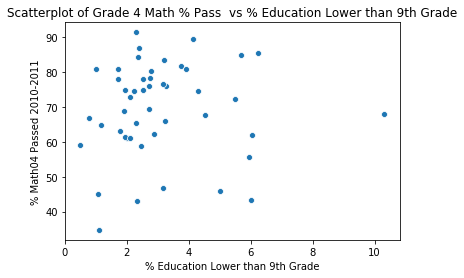

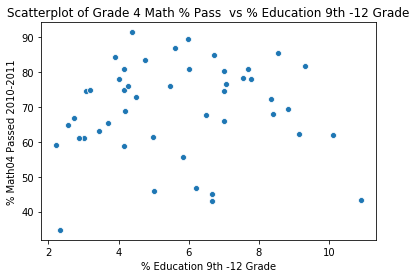

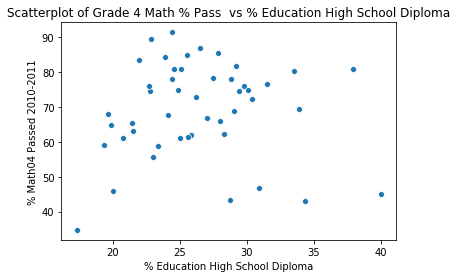

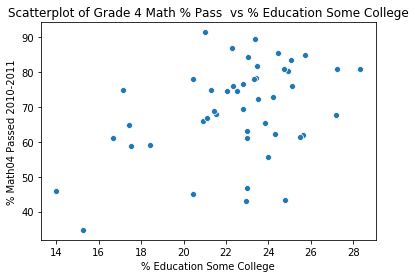

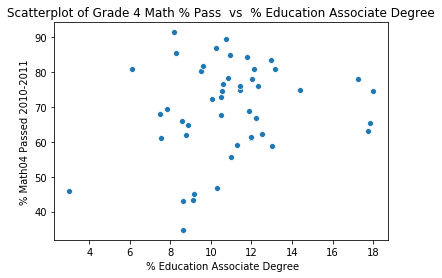

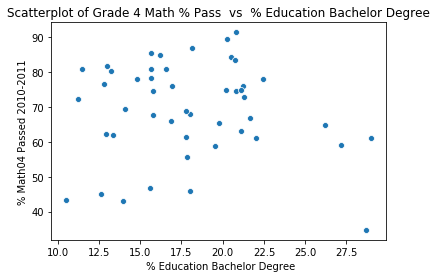

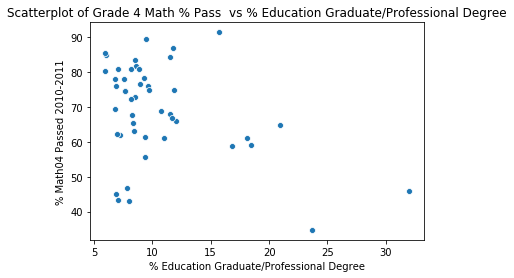

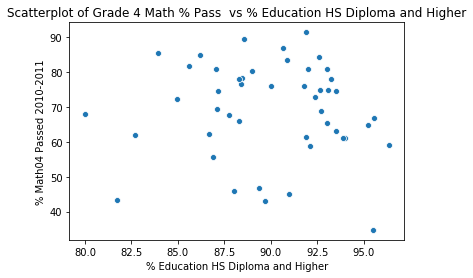

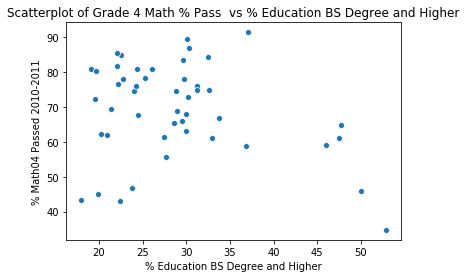

In [21]:
for key, value in Education_dict.items():
    sns.scatterplot(x= key, y = 'ALL_MTH04pctprof_1011', data = Parent_social_econ_df_sy201011, legend='full')
    plt.ylabel("% Math04 Passed 2010-2011")
    xlabel = "{0}".format(value)
    plt.xlabel(xlabel)
    title = "Scatterplot of Grade 4 Math % Pass  vs {0}".format(value)
    plt.title(title)
    plt.show()

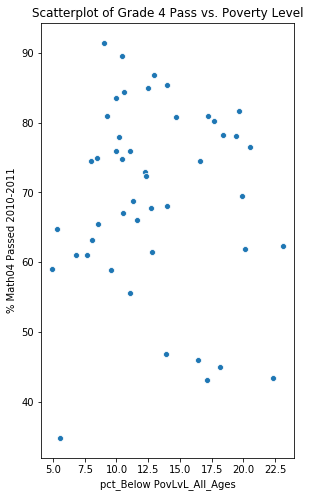

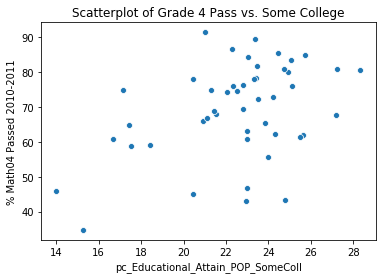

In [22]:
plt.figure(figsize=(10,8))
plt.subplot(121)


sns.scatterplot(x='pct_Below PovLvL_All_Ages',y = 'ALL_MTH04pctprof_1011', data = df3, legend='full')
plt.ylabel("% Math04 Passed 2010-2011")
plt.title("Scatterplot of Grade 4 Pass vs. Poverty Level")
plt.show()
sns.scatterplot(x='pc_Educational_Attain_POP_SomeColl',y = 'ALL_MTH04pctprof_1011', data = df3, legend='full')
plt.ylabel("% Math04 Passed 2010-2011")
plt.title("Scatterplot of Grade 4 Pass vs. Some College")
#plt.subplot(122)
#sns.boxplot(x='bedrooms',y= 'price', data = listings)
#plt.ylabel("price")
#plt.title("Boxplot of Price vs. Bedrooms")
plt.show()

In [23]:
# Create a correlation matrix
corr    = Parent_social_econ_df_sy201011.corr()
pos_cor = corr['ALL_MTH04pctprof_1011'] >0
neg_cor = corr['ALL_MTH04pctprof_1011'] <0


In [24]:
corr['ALL_MTH04pctprof_1011'][pos_cor].sort_values(ascending = False)

ALL_MTH04pctprof_1011                 1.000000
ECD_MTH04pctprof_1011                 0.958014
ALL_MTH08pctprof_1011                 0.864367
ECD_MTH08pctprof_1011                 0.816835
HOM_MTH04pctprof_1011                 0.696511
HOM_MTH08pctprof_1011                 0.553276
pc_Educational_Attain_POP_SomeColl    0.408007
LEA_CWIFTSE                           0.372201
pc_Educational_Attain_POP_AssocDeg    0.204845
pctmoe_Below PovLvL_Age_gte_65        0.096583
pctmoe_Below PovLvL_All_Ages          0.095552
pctmoe_Below PovLvL_Age_gte_18        0.095094
pctmoe_Below PovLvL_Age_18_64         0.094911
pc_Educational_Attain_POP_9th-12th    0.053208
pc_ Educational_Attain_POP_LT9th      0.046383
pc_Educational_Attain_POP_HS_GRAD     0.041805
ALL_MTH08numvalid_1011                0.017581
ALL_MTH04numvalid_1011                0.008353
pct_Below PovLvL_Age_gte_65           0.007468
Name: ALL_MTH04pctprof_1011, dtype: float64

In [25]:
corr['ALL_MTH04pctprof_1011'][neg_cor].sort_values()

pc_Educational_Attain_POP_GradProf          -0.373750
LEA_CWIFTEST                                -0.296637
pct_Educational_Attain_BS_Deg_higher        -0.266530
num_Educational_Attain_POP_GradProf         -0.151693
FIPST                                       -0.126006
LEAID_x                                     -0.125706
LEAID_y                                     -0.125540
num_Educational_Attain_POP_LT9th            -0.114629
PDP02.5_38est                               -0.107713
HOM_MTH08numvalid_1011                      -0.105350
num_Educational_Attain_POP_9th-12th         -0.099718
num_Educational_Attain_POP_HS_GRAD          -0.098726
num_Educational_Attain_POP                  -0.094095
PDP02.5_37est                               -0.092600
pc_Educational_Attain_POP_BacDeg            -0.086043
HOM_MTH04numvalid_1011                      -0.077489
num_Educational_Attain_POP_SomeColl         -0.074466
num_Educational_Attain_POP_BacDeg           -0.071297
num_Educational_Attain_POP_A

## Summary for  Math on  School Year  2010 - 2011

There is slightly less  than moderate correlation between students who are proficient at Math in Grade 4 and parents who have attained at  least  some college education.   
